<a href="https://colab.research.google.com/github/bobur-amirov/DataScienceExample/blob/main/aviakompaniya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!ls

sample_data  sample_submission.csv  test_dataset.csv


In [101]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import jaccard_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [104]:
train_set = pd.read_csv('train_dataset.csv')
train_set.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0


In [105]:
test_set = pd.read_csv('test_dataset.csv')
test_set.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,25,Personal Travel,Eco,2704,2,2,2,...,5,2,4,4,3,5,1,5,152,191.0
1,2,Female,Loyal Customer,49,Business travel,Business,1623,1,1,1,...,4,2,2,2,2,4,2,3,60,52.0
2,3,Male,Loyal Customer,51,Business travel,Business,338,4,4,4,...,5,5,5,5,5,4,5,4,0,0.0
3,4,Male,Loyal Customer,34,Business travel,Eco Plus,95,0,0,0,...,1,5,4,4,1,3,3,5,0,0.0
4,5,Male,Loyal Customer,34,Personal Travel,Eco,602,4,4,4,...,5,5,4,5,4,5,5,5,130,140.0


In [110]:
train_set.fillna(train_set.mean(), inplace=True)
train_set.shape


<ipython-input-110-7c12def24409>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_set.fillna(train_set.mean(), inplace=True)


(10000, 24)

In [112]:
test_set.fillna(test_set.mean(), inplace=True)
test_set.shape

<ipython-input-112-9a4068a26115>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test_set.fillna(test_set.mean(), inplace=True)


(4000, 23)

In [111]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 10000 non-null  int64  
 1   Gender                             10000 non-null  object 
 2   Customer Type                      10000 non-null  object 
 3   Age                                10000 non-null  int64  
 4   Type of Travel                     10000 non-null  object 
 5   Class                              10000 non-null  object 
 6   Flight Distance                    10000 non-null  int64  
 7   Inflight wifi service              10000 non-null  int64  
 8   Departure/Arrival time convenient  10000 non-null  int64  
 9   Ease of Online booking             10000 non-null  int64  
 10  Gate location                      10000 non-null  int64  
 11  Food and drink                     10000 non-null  int6

In [113]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 4000 non-null   int64  
 1   Gender                             4000 non-null   object 
 2   Customer Type                      4000 non-null   object 
 3   Age                                4000 non-null   int64  
 4   Type of Travel                     4000 non-null   object 
 5   Class                              4000 non-null   object 
 6   Flight Distance                    4000 non-null   int64  
 7   Inflight wifi service              4000 non-null   int64  
 8   Departure/Arrival time convenient  4000 non-null   int64  
 9   Ease of Online booking             4000 non-null   int64  
 10  Gate location                      4000 non-null   int64  
 11  Food and drink                     4000 non-null   int64

In [114]:
train_set['satisfaction'].value_counts()

0    5000
1    5000
Name: satisfaction, dtype: int64

In [115]:
train_set.drop(columns=['id'], inplace=True)

In [116]:
corr_matrix = train_set.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Age,1.000000,0.110823,0.020904,0.036071,0.026964,0.012077,0.021971,0.215613,0.169291,0.097421,0.073412,0.060124,0.040368,0.038761,0.036921,0.062409,0.015618,0.019043,0.144302
Flight Distance,0.110823,1.000000,0.002341,0.021320,0.052807,0.017513,0.065939,0.213859,0.170203,0.150573,0.115167,0.140509,0.073161,0.066881,0.058939,0.100705,0.011425,0.002897,0.298703
Inflight wifi service,0.020904,0.002341,1.000000,0.362355,0.730731,0.362702,0.119807,0.438034,0.107020,0.198351,0.133511,0.172526,0.123695,0.039923,0.113467,0.119484,0.019843,0.023061,0.277395
Departure/Arrival time convenient,0.036071,0.021320,0.362355,1.000000,0.456498,0.479002,0.001982,0.046456,0.002102,0.007094,0.071368,0.027487,0.072969,0.078166,0.062814,0.001172,0.010846,0.008973,0.067638
Ease of Online booking,0.026964,0.052807,0.730731,0.456498,1.000000,0.476405,0.017193,0.388220,0.016831,0.043574,0.053613,0.116333,0.044259,0.013875,0.032168,0.007301,0.001474,0.003711,0.164662
Gate location,0.012077,0.017513,0.362702,0.479002,0.476405,1.000000,0.002645,0.003610,0.008359,0.001144,0.015083,0.008752,0.000493,0.037372,0.003065,0.015090,0.001907,0.000683,0.007169
Food and drink,0.021971,0.065939,0.119807,0.001982,0.017193,0.002645,1.000000,0.239007,0.573063,0.598209,0.062373,0.045929,0.030299,0.087117,0.035568,0.641701,0.011761,0.011362,0.207854
Online boarding,0.215613,0.213859,0.438034,0.046456,0.388220,0.003610,0.239007,1.000000,0.414889,0.292397,0.165847,0.133977,0.080804,0.207733,0.077808,0.341899,0.001727,0.003680,0.504986
Seat comfort,0.169291,0.170203,0.107020,0.002102,0.016831,0.008359,0.573063,0.414889,1.000000,0.615310,0.136570,0.121991,0.081107,0.192491,0.074447,0.677454,0.014833,0.013964,0.342294
Inflight entertainment,0.097421,0.150573,0.198351,0.007094,0.043574,0.001144,0.598209,0.292397,0.615310,1.000000,0.442295,0.338588,0.393506,0.109921,0.418871,0.688927,0.029500,0.029307,0.400900


In [117]:
train_set.corrwith(train_set['satisfaction']).abs().sort_values(ascending=False)

satisfaction                         1.000000
Online boarding                      0.504986
Inflight entertainment               0.400900
Seat comfort                         0.342294
On-board service                     0.326426
Leg room service                     0.324368
Cleanliness                          0.310338
Flight Distance                      0.298703
Inflight wifi service                0.277395
Baggage handling                     0.247965
Inflight service                     0.240584
Checkin service                      0.232359
Food and drink                       0.207854
Ease of Online booking               0.164662
Age                                  0.144302
Departure/Arrival time convenient    0.067638
Arrival Delay in Minutes             0.048582
Departure Delay in Minutes           0.042960
Gate location                        0.007169
dtype: float64

In [118]:
X = train_set.drop('satisfaction', axis=1)
y = train_set['satisfaction']

In [119]:
num_column = ['Online boarding', 'Inflight entertainment', 'Seat comfort', 'On-board service', 'Leg room service', 'Cleanliness', 
              'Flight Distance', 'Inflight wifi service', 'Baggage handling', 'Inflight service', 'Checkin service', 'Food and drink',
              'Ease of Online booking', 'Age', 'Departure/Arrival time convenient', 'Arrival Delay in Minutes', 'Departure Delay in Minutes', 'Gate location']
obj_column = ['Gender','Customer Type', 'Type of Travel', 'Class']

In [120]:
num_pipeline = Pipeline([
          ('std_scaler', StandardScaler())             
])
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_column),
    ('cat', OneHotEncoder(), obj_column)
])

In [121]:
X_array = full_pipeline.fit_transform(X)

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X_array,y, test_size=0.2, random_state=42)

In [125]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

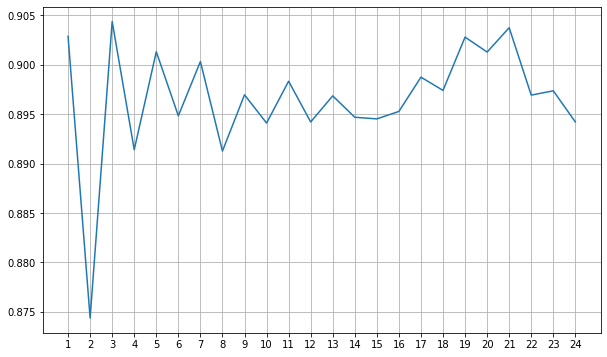

In [127]:
f1 = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

In [126]:
jaccard_score(y_test, y_predict)

0.8086538461538462

In [128]:
confusion_matrix(y_test, y_predict)


array([[960,  42],
       [157, 841]])

In [129]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [130]:
y_predict2 = tree_model.predict(X_test)

In [131]:
jaccard_score(y_test, y_predict2)

0.867231638418079

In [132]:
confusion_matrix(y_test, y_predict2)

array([[938,  64],
       [ 77, 921]])

In [133]:
test_data = full_pipeline.fit_transform(test_set)

In [134]:
y_predict3 = tree_model.predict(test_data)

In [135]:
submission3 = pd.DataFrame(y_predict3)
submission3['id'] = test_set['id']
submission3.rename({0:'satisfaction'},axis =1,inplace=True)
submission3 = submission3[['id','satisfaction']]

In [136]:
submission3.to_csv('submission3.csv',index=False)

In [137]:
subm = pd.read_csv('submission3.csv')
subm.head()

,id,satisfaction
0,1,0
1,2,0
2,3,1
3,4,1
4,5,1
